# Loading in Data

Loading the scrapped data to pandas

In [28]:
import pandas as pd
import glob
import os
import numpy as np

path = ""
all_files = glob.glob(os.path.join(path, "*.csv"))
activity_df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
activity_df['Created'] = pd.to_datetime(activity_df['Created'])
activity_df['Updated'] = pd.to_datetime(activity_df['Updated'])
activity_df = activity_df[activity_df['User'].isin(["XXX"])]
pr_df = activity_df[["ID", "SrcRepo", "SrcBranch", "DestRepo", "DestBranch", "Title", "Description", "State", "Author", "Created", "Updated",
			"FileChanged", "Added", "Removed", "Total"]].copy().drop_duplicates()
pr_df = pr_df[pr_df['Author'].isin(["XXX"])]

Make sure the data is loaded properly and do column manipulation for further analysis

In [29]:
activity_df['DateGroup'] = activity_df['Updated'].dt.strftime('%Y-%m')
activity_df['SrcRepo'] = activity_df['SrcRepo'].str.split('/').str[1]
activity_df['DestRepo'] = activity_df['DestRepo'].str.split('/').str[1]
activity_df.head()

,ID,SrcRepo,SrcBranch,DestRepo,DestBranch,Title,Description,State,Author,Created,Updated,FileChanged,Added,Removed,Total,Type,User,Content,DateGroup
924,104,kvn-krdv-finverse-ms,feature/KV-3190,kvn-krdv-finverse-ms,release/staging,[KV-3190]: rewrite all finverse urls into fincome,Kindly review these changes related to ticket ...,OPEN,Bagas Irwansyah,2023-08-07,2023-08-08,2,5,1,6,approval,Ade Saputra,2023-08-07,2023-08
925,104,kvn-krdv-finverse-ms,feature/KV-3190,kvn-krdv-finverse-ms,release/staging,[KV-3190]: rewrite all finverse urls into fincome,Kindly review these changes related to ticket ...,OPEN,Bagas Irwansyah,2023-08-07,2023-08-08,2,5,1,6,pullrequest_comment,Ade Saputra,maybe check the part where backend call finver...,2023-08
929,104,kvn-krdv-finverse-ms,feature/KV-3190,kvn-krdv-finverse-ms,release/staging,[KV-3190]: rewrite all finverse urls into fincome,Kindly review these changes related to ticket ...,OPEN,Bagas Irwansyah,2023-08-07,2023-08-08,2,5,1,6,pullrequest_comment,Ade Saputra,"maintain both url, later after deployed can cl...",2023-08
2149,2608,kredivo_vietnam,premium_limit_increase,kredivo_vietnam,release/staging,Premium limit increase,* KV-3273 KV-3276 KV-3278 initial commit premi...,OPEN,Ade Saputra,2023-10-05,2023-10-06,18,1705,1054,2759,pullrequest_comment,Ade Saputra,"same, no version just like other upgrade",2023-10
2150,2608,kredivo_vietnam,premium_limit_increase,kredivo_vietnam,release/staging,Premium limit increase,* KV-3273 KV-3276 KV-3278 initial commit premi...,OPEN,Ade Saputra,2023-10-05,2023-10-06,18,1705,1054,2759,pullrequest_comment,Ade Saputra,"yeah they don’t want version on bscore atm,",2023-10


In [30]:
cross_activity_df = activity_df.copy()
cross_activity_df.head()

cond = cross_activity_df[ (cross_activity_df['User'] >= "XXX") & (cross_activity_df['Author'] == "XXX")].index
cross_activity_df.drop(cond, inplace = True)

In [31]:
pr_df['DateGroup'] = pr_df['Updated'].dt.strftime('%Y-%m')
pr_df['SrcRepo'] = pr_df['SrcRepo'].str.split('/').str[1]
pr_df['DestRepo'] = pr_df['DestRepo'].str.split('/').str[1]
pr_df.head()

,ID,SrcRepo,SrcBranch,DestRepo,DestBranch,Title,Description,State,Author,Created,Updated,FileChanged,Added,Removed,Total,DateGroup
2149,2608,kredivo_vietnam,premium_limit_increase,kredivo_vietnam,release/staging,Premium limit increase,* KV-3273 KV-3276 KV-3278 initial commit premi...,OPEN,Ade Saputra,2023-10-05,2023-10-06,18,1705,1054,2759,2023-10
2288,2526,kredivo_vietnam,unit_test_user,kredivo_vietnam,master,Unit test user,* KV-3081 unit test analytics\n* \[KV-2995\]: ...,MERGED,Ade Saputra,2023-08-31,2023-09-13,53,3551,5194,8745,2023-09
2405,2476,kredivo_vietnam,features/KV-3221,kredivo_vietnam,master,KV-3221 timeout sf fpt verify otp 180s,NaN,MERGED,Ade Saputra,2023-08-14,2023-08-14,2,27,1,28,2023-08
3202,2449,kredivo_vietnam,feature/KV-3153,kredivo_vietnam,master,Feature/KV-3153,* \[KV-3153\]: script for sf tiki copy data\n*...,MERGED,Ade Saputra,2023-08-08,2023-08-08,4,329,0,329,2023-08
3225,2148,kredivo_vietnam,bugfix/KV-2937,kredivo_vietnam,master,Bugfix/KV-2937,* KV-2937 handle lifetime for sf preapproval\n...,MERGED,Ade Saputra,2023-05-26,2023-05-29,2,9,2,11,2023-05


# PR Data Analysis

## Grouped by Repositories

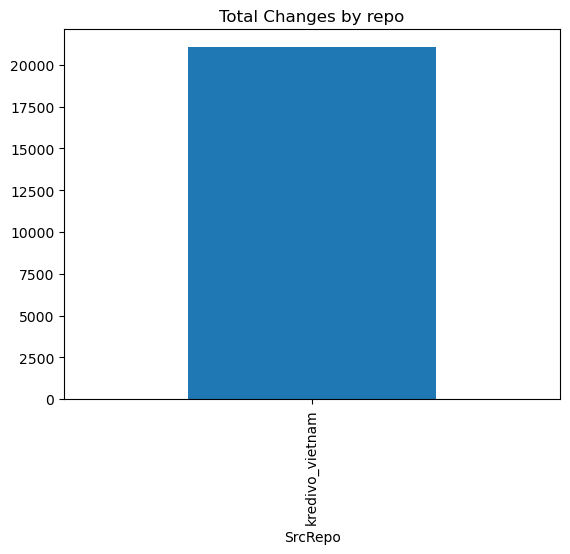

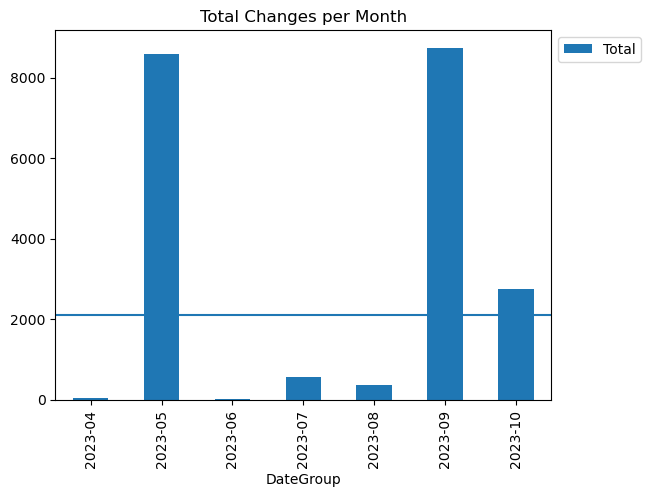

In [32]:
def pr_total_group_by(df,myList= [],*args): 
    c = ['Total']
    return df.groupby(myList)[c].sum()

def autopct_total(pct, df):
    absolute = int(pct/100.*np.sum(df["Total"].values.tolist()))
    return "{:.1f}%\n({:d})".format(pct, absolute)

repo_group = pr_total_group_by(pr_df, ['SrcRepo'])
# repo_group = repo_group.plot(kind= 'pie', y= 'Total', legend=False, autopct = lambda pct: autopct_total(pct, repo_group))
repo_group = repo_group.plot(kind= 'bar', y= 'Total', legend=False)
repo_group.set_title('Total Changes by repo')
repo_group.set_ylabel('');

#Un comment if needed per month data
date_repo_pivot = pr_df.pivot_table( index='DateGroup', values=['Total'], aggfunc='sum')
date_repo_group = date_repo_pivot.plot(kind="bar", legend=True)
date_repo_group.set_title('Total Changes per Month')
date_repo_group.set_ylabel('');
date_repo_group.axhline(pr_df["Total"].mean())
date_repo_group.legend(bbox_to_anchor=(1.0, 1.0))


# PR Activity Analysis

## Group by Repositories

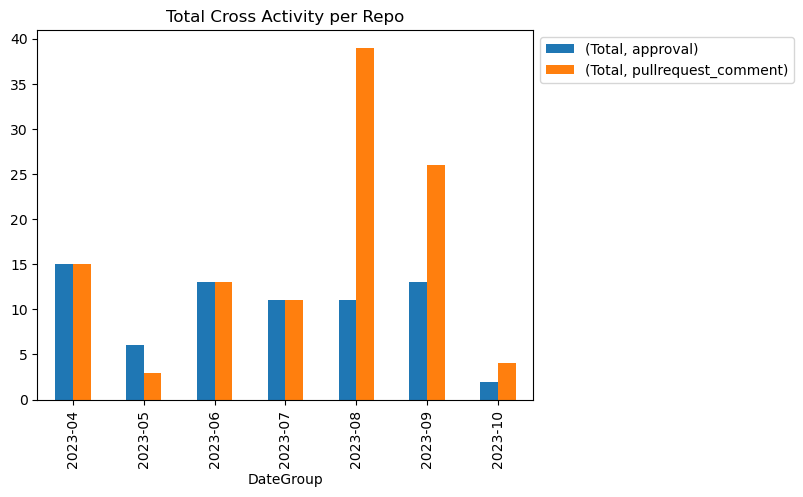

In [33]:
cross_activity_repo_pivot = cross_activity_df.pivot_table( index='DateGroup', columns='Type', values=['Total'], aggfunc='count')
cross_activity_repo_pivot = cross_activity_repo_pivot.plot(kind="bar", legend=True)
cross_activity_repo_pivot.set_title('Total Cross Activity per Repo')
cross_activity_repo_pivot.set_ylabel('');
cross_activity_repo_pivot.legend(bbox_to_anchor=(1.0, 1.0))